In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [63]:
df = pd.read_pickle(r'C:\Users\lenovo\Downloads\raw_df.pkl')
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [64]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [65]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [66]:
df.shape

(32561, 15)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [68]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
df.workclass.mode()

0    Private
dtype: object

In [70]:
df.occupation.mode()
df["native.country"].mode()

0    United-States
dtype: object

In [71]:
df["workclass"].fillna(df["workclass"].mode()[0],inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0],inplace=True)
df["native.country"].fillna(df["native.country"].mode()[0],inplace=True)


In [72]:
cor_matrix = df.corr().round(2)
cor_matrix

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.00,-0.08,0.04,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02
education.num,0.04,-0.04,1.00,0.12,0.08,0.15
capital.gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital.loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours.per.week,0.07,-0.02,0.15,0.08,0.05,1.00


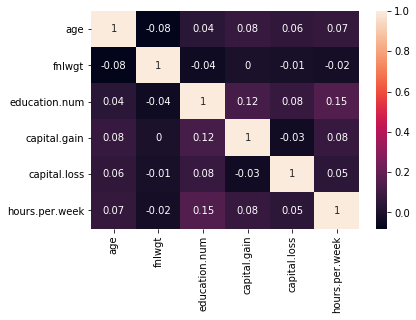

In [73]:
sb.heatmap(cor_matrix,annot=True)

In [74]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

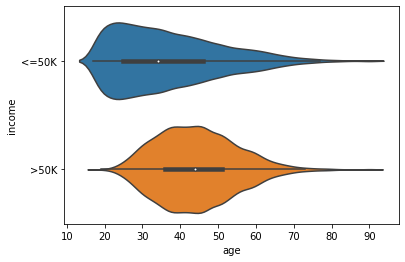

In [75]:
sb.violinplot(x = "age",y = "income",data = df)

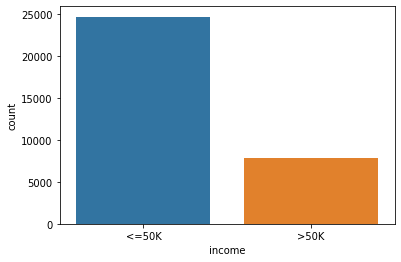

In [76]:
sb.countplot(x = "income",data = df)

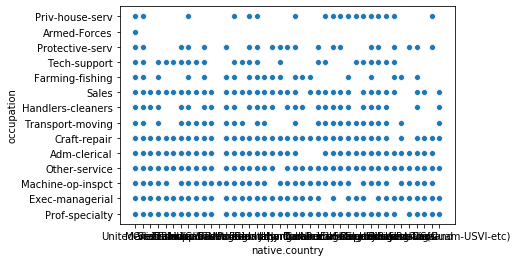

In [77]:
sb.scatterplot(x = "native.country",y = "occupation",data = df)

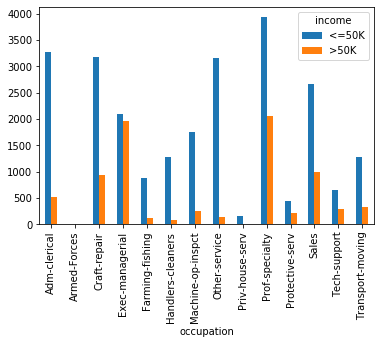

In [78]:
pd.crosstab(df.occupation,df.income).plot(kind = "bar")

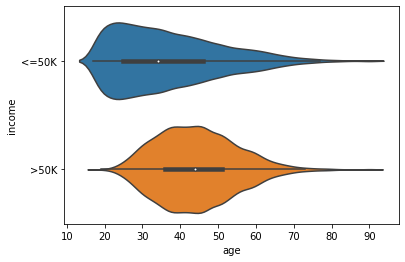

In [79]:
sb.violinplot(x = "age",y = "income",data = df)

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
df["workclass"] = le.fit_transform(df["workclass"])
df["occupation"] = le.fit_transform(df["occupation"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income"] = le.fit_transform(df["income"])
df["education"] = le.fit_transform(df["education"])
df["marital.status"] = le.fit_transform(df["marital.status"])
df["relationship"] = le.fit_transform(df["relationship"])
df["native.country"] = le.fit_transform(df["native.country"])

In [82]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [83]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [84]:
df.income.values

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
df.get_values()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  """Entry point for launching an IPython kernel.


array([[    90,      3,  77053, ...,     40,     38,      0],
       [    82,      3, 132870, ...,     18,     38,      0],
       [    66,      3, 186061, ...,     40,     38,      0],
       ...,
       [    40,      3, 154374, ...,     40,     38,      1],
       [    58,      3, 151910, ...,     40,     38,      0],
       [    22,      3, 201490, ...,     20,     38,      0]], dtype=int64)

In [86]:
df.income.get_ftype_counts()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_ftype_counts is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


int32:dense    1
dtype: int64

In [87]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [88]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [89]:
df =   df.drop(["fnlwgt"],axis = 1)
x = df.drop(["income"],axis = 1)
y = df["income"]

In [90]:
df_columns = df.columns
df_columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [91]:
df.head(5)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,15,10,5,9,3,4,0,0,3900,40,38,0


In [92]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(sampling_strategy=1)

In [93]:
x_res,y_res = rs.fit_sample(x,y)
x_res.shape
y_res.shape

(49440,)

In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit_transform(x)

In [95]:
pd.DataFrame(data=ss,columns=df_columns.drop("income"))

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.085296,1.214869,-0.031360,0.921634,0.971958,-0.277805,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.26137
32557,-0.849080,-0.085296,-0.852205,0.746039,-0.406212,1.475401,2.211698,0.393668,-1.422331,-0.14592,-0.216660,-0.197409,0.26137
32558,0.103983,-0.085296,0.181332,-0.420060,-0.406212,-0.034928,-0.900181,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.26137
32559,1.423610,-0.085296,0.181332,-0.420060,2.249480,-1.545256,1.589322,0.393668,-1.422331,-0.14592,-0.216660,-0.035429,0.26137


In [96]:
ss.shape

(32561, 13)

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca1 = pca.fit_transform(ss)
pca1

array([[ 1.11124935, -0.66859104,  0.96997535, ..., -1.2036716 ,
         1.69310724,  2.40545095],
       [ 0.20970095, -0.61275592,  1.11162842, ..., -1.7696719 ,
         3.03273899,  1.39459404],
       [-0.64907825, -2.02924751,  1.30997023, ..., -2.1248197 ,
         0.51102601,  1.12639549],
       ...,
       [ 0.93223381,  0.48356494, -0.35226367, ..., -0.10739301,
         0.28284416, -0.34524165],
       [-1.96390391, -0.45510888,  0.60231774, ..., -0.37641014,
         0.83318036,  2.53234189],
       [-1.59518529,  0.07792236, -0.89559666, ..., -0.4881393 ,
         1.27276816, -0.88003457]])

In [98]:
df1 = pd.DataFrame(data=pca1,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11"])
df1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,1.111249,-0.668591,0.969975,-0.569491,-6.666929,5.286192,4.396260,5.022357,-1.203672,1.693107,2.405451
1,0.209701,-0.612756,1.111628,-1.348986,-6.696024,4.518945,4.563293,5.281688,-1.769672,3.032739,1.394594
2,-0.649078,-2.029248,1.309970,0.990106,-7.022504,4.328050,4.626841,4.833208,-2.124820,0.511026,1.126395
3,-0.117167,0.980265,2.062779,-2.087474,-5.811677,4.187489,3.801755,4.947824,0.162643,-1.124371,-1.360595
4,-0.404434,-2.070929,-0.315472,-0.064692,-6.156383,3.532640,4.020911,4.672808,-0.202598,0.505208,0.127959
...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.035163,-0.665413,-1.847100,0.709527,-0.090195,-0.270047,-0.299953,-0.370972,0.125679,0.285155,-0.361979
32557,-1.926244,-0.860193,-0.195657,-0.082064,0.396985,1.503356,-0.084057,-0.171155,1.190598,-1.488395,-0.272925
32558,0.932234,0.483565,-0.352264,-0.387692,-0.011611,-0.198563,-0.375245,-0.311208,-0.107393,0.282844,-0.345242
32559,-1.963904,-0.455109,0.602318,-1.161707,0.273803,-0.427386,0.396671,0.618798,-0.376410,0.833180,2.532342


In [99]:
print('Variance of each component:', pca.explained_variance_ratio_)


Variance of each component: [0.15897992 0.10875412 0.08507157 0.08367122 0.07986272 0.07744612
 0.07552468 0.07038044 0.06620535 0.06574427 0.05280479]


In [100]:
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))


 Total Variance Explained: 92.44


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.3)

In [102]:
x_train.shape

(34608, 13)

In [103]:
x_test.shape

(14832, 13)

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [105]:
lr.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
lr.score(x_test,y_test)

0.7306499460625674

In [107]:
y_test.value_counts()

0    7436
1    7396
Name: income, dtype: int64

In [108]:
y_pred = lr.predict(x_test)
y_pred
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[5727 1709]
 [2286 5110]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7436
           1       0.75      0.69      0.72      7396

    accuracy                           0.73     14832
   macro avg       0.73      0.73      0.73     14832
weighted avg       0.73      0.73      0.73     14832



In [111]:
#pip install xgboost

In [112]:
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [113]:
xgc = xg.XGBClassifier(n_estimators = 500,max_depth = 5,base_score = 0.5,objective = "binary:logistic",random_state = 10)
xgc

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=10, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [114]:
xgc.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [115]:
xgc.score(x_test,y_test)

0.8776294498381877

In [116]:
y_pred = xgc.predict(x_test)
y_pred
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(xgc.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[6187 1249]
 [ 566 6830]]


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7436
           1       0.85      0.92      0.88      7396

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

